# 1.3: Optimization in Relation to Problem Solving

In [14]:
#Import Libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

# 1. Download the script

Done.

# 2. Install the 3D visualizer.

Done.

# 3. Load your scaled data set as a “.csv” file in a new Python script.

In [20]:
#Import the scaled dataset from last exercise
df_clean = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/weather_cleaned.csv')

In [21]:
df_clean.head(10)

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   
5                  1            0.78           1.018                    0.76   
6                  3            0.87           1.018                    0.66   
7                  8            0.95           1.018                    0.19   
8                  8            0.98           1.018                    0.19   
9                  3            0.74           1.018                    0.38   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   
5                 0.00             7.7              1.5            -1.8   
6                 0.00             5.4             -0.4            -4.5   
7                 0.09             0.0              0.9            -2.2   
8                 0.56             0.0             -2.4            -4.9   
9                 0.01             1.1             -6.9           -10.6   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_cloud_cover  \
0            10.9                     1  ...                     5   
1            10.1                     6  ...                     7   
2             9.9                     6  ...                     7   
3            10.6                     8  ...                     7   
4             6.0                     8  ...                     3   
5             6.4                     8  ...                     5   
6             6.1                     8  ...                     7   
7             2.6                     6  ...                     2   
8             1.5                     8  ...                     5   
9            -3.4                     8  ...                     1   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   
5               0.76             1.0326                       0.33   
6               0.73             1.0230                       0.42   
7               0.72             1.0203                       0.50   
8               0.67             1.0243                       0.14   
9               0.66             1.0307                       0.49   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   
5                    0.00                0.9                 4.1   
6                    0.00                2.2                 7.9   
7                    0.00                6.2                 8.5   
8                    0.00                0.1                 6.8   
9                    0.00                6.4                 1.8   

   VA

In [30]:
print(df_clean.columns.tolist())

['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_ma

In [32]:
#Reduce to just the mean temperatures
df = df_clean[['DATE', 'BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [34]:
df.shape

(22950, 16)

In [36]:
df.head()

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0  1960-01-01              6.5                 3.7                 2.4   
1  1960-01-02              6.1                 2.9                 2.3   
2  1960-01-03              8.5                 3.1                 2.7   
3  1960-01-04              6.3                 2.0                 2.0   
4  1960-01-05              3.0                 2.0                 2.5   

   DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
0               9.3                  10.0                10.6   
1               7.7                   8.2                 6.1   
2               6.8                   7.1                 8.4   
3               6.7                   6.8                 9.4   
4               8.0                   7.7                 8.9   

   KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
0               7.9                 -0.6                   9.5   
1               7.7                  2.1                   8.6   
2               6.5                  4.6                   6.9   
3               5.8                  3.2                   7.0   
4               5.4                  3.6                   8.1   

   MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  SONNBLICK_temp_mean  \
0               7.6                 6.9             4.9                 -5.9   
1               9.8                 6.2             3.4                 -9.5   
2               8.6                 5.8             1.9                 -9.5   
3              10.3                 3.9             3.0                -11.5   
4              12.1                 1.8             3.7                 -9.3   

   STOCKHOLM_temp_mean  VALENTIA_temp_mean  
0                  4.2                 8.5  
1                  4.0                 8.9  
2                  2.4                10.5  
3                  1.2                 7.4  
4                  3.3                 5.7

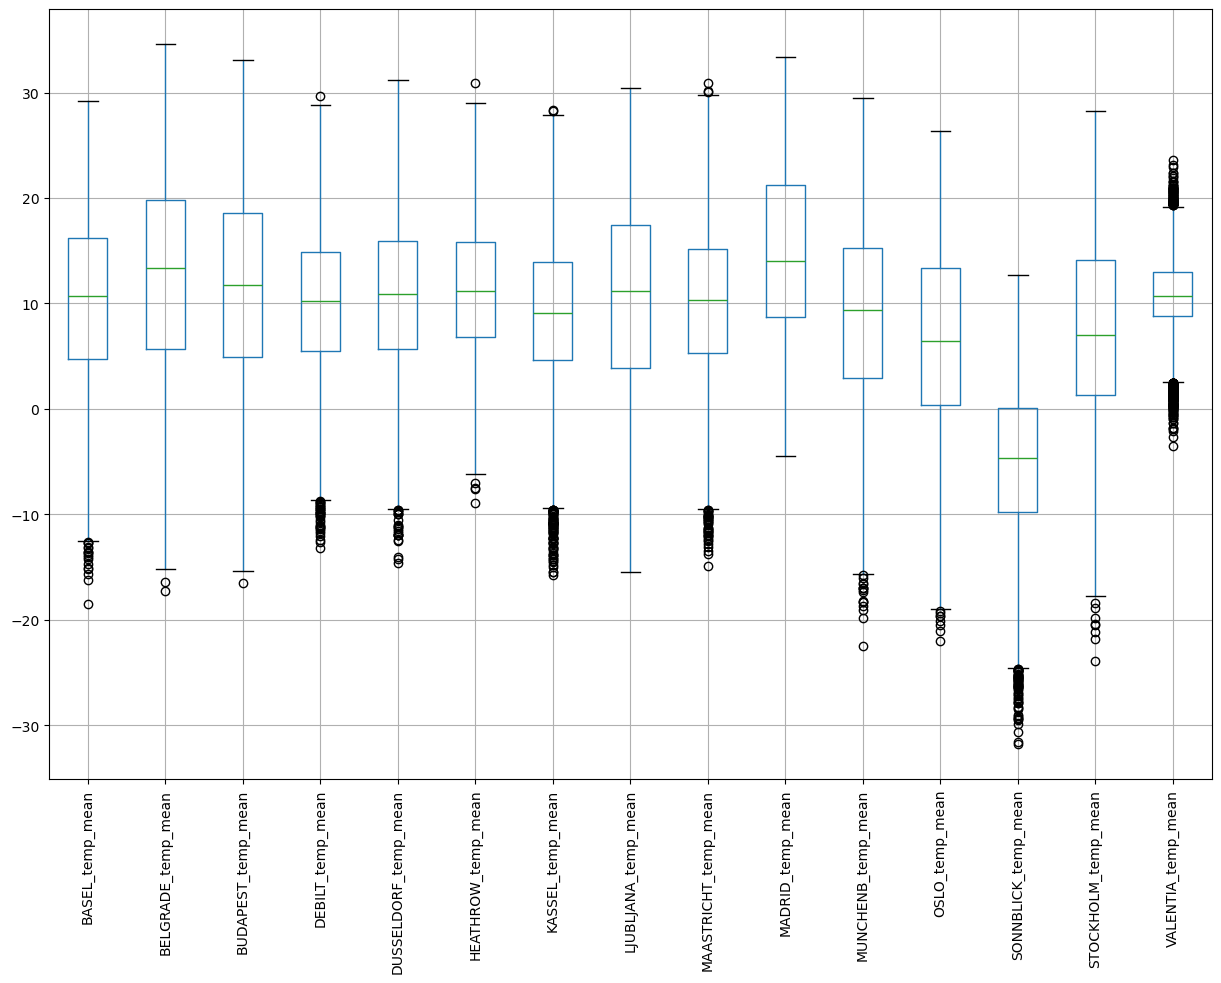

In [42]:
#Drop 'date' 
notemp = df.drop(columns=[col for col in ['date', 'month'] if col in df.columns])

#Plot the boxplot
notemp.boxplot(figsize=(15, 10))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# 4. Follow the instructions included in the script to look at a year of temperature data for one of the weather stations.

In [45]:
#Reduce dataset to a single year
df_1960 = df[df['DATE'].astype(str).str.contains('1960')] #1960
df_1960

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0    1960-01-01              6.5                 3.7                 2.4   
1    1960-01-02              6.1                 2.9                 2.3   
2    1960-01-03              8.5                 3.1                 2.7   
3    1960-01-04              6.3                 2.0                 2.0   
4    1960-01-05              3.0                 2.0                 2.5   
..          ...              ...                 ...                 ...   
361  1960-12-27              0.9                 1.4                -0.5   
362  1960-12-28              0.9                 1.6                -0.3   
363  1960-12-29              1.5                 1.9                 2.2   
364  1960-12-30             -1.0                 1.7                 1.8   
365  1960-12-31              2.0                 2.9                 1.4   

     DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
0                 9.3                  10.0                10.6   
1                 7.7                   8.2                 6.1   
2                 6.8                   7.1                 8.4   
3                 6.7                   6.8                 9.4   
4                 8.0                   7.7                 8.9   
..                ...                   ...                 ...   
361               2.9                   4.1                 2.8   
362               0.4                   2.0                 2.8   
363               0.1                   1.8                 3.0   
364               1.7                   1.4                 5.0   
365               3.5                   3.6                 4.7   

     KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
0                 7.9                 -0.6                   9.5   
1                 7.7                  2.1                   8.6   
2                 6.5                  4.6                   6.9   
3                 5.8                  3.2                   7.0   
4                 5.4                  3.6                   8.1   
..                ...                  ...                   ...   
361               3.1                 -3.5                   3.5   
362               2.0                 -1.5                   1.2   
363               0.3                 -1.2                   1.2   
364              -0.3                  0.2                   2.3   
365               1.2                  0.1                   3.9   

     MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
0                 7.6                 6.9             4.9   
1                 9.8                 6.2             3.4   
2                 8.6                 5.8             1.9   
3                10.3                 3.9             3.0   
4                12.1                 1.8             3.7   
..                ...                 ...             ...   
361               7.0                 0.1             3.0   
362               5.0                -1.5             1.9   
363               8.1                -2.6             0.6   
364               9.2                -3.3            -0.4   
365               6.5                -0.5            -0.1   

     SONNBLICK_temp_mean  STOCKHOLM_temp_mean  VALENTIA_temp_mean  
0                   -5.9                  4.2                 8.5  
1                   -9.5                  4.0                 8.9  
2                   -9.5                  2.4                10.5  
3                  -11.5                  1.2                 7.4  
4                   -9.3                  3.3                 5.7  
..                   ...                  ...                 ...  
361                -11.3                  4.1                 5.3  
362                -13.8                  2.8                 5.7  
363                -16.4                  2.4                 7.4  
364                -16.5                  1.5                 6

In [47]:
df_1960.describe()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
count       366.000000          366.000000          366.000000   
mean          9.639071           12.374590           11.200546   
std           6.890878            8.108722            8.047309   
min         -13.100000           -8.500000           -8.800000   
25%           4.825000            7.425000            6.000000   
50%          10.000000           13.150000           11.700000   
75%          15.175000           18.500000           18.075000   
max          23.800000           28.900000           27.100000   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
count        366.000000            366.000000          366.000000   
mean           9.689891             10.484973           10.617760   
std            5.754249              6.243999            5.261182   
min           -6.700000             -8.800000           -2.000000   
25%            5.800000              6.225000            6.400000   
50%            9.950000             10.700000           10.800000   
75%           14.400000             15.575000           15.300000   
max           21.700000             24.100000           21.200000   

       KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
count         366.00000           366.000000            366.000000   
mean            9.31612            10.105464              9.721585   
std             6.53131             7.483631              6.013678   
min           -14.20000           -11.700000            -11.500000   
25%             4.62500             4.625000              5.400000   
50%             9.70000            10.700000             10.500000   
75%            14.57500            16.500000             14.475000   
max            22.70000            24.500000             21.400000   

       MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
count        366.000000          366.000000      366.000000   
mean          13.963934            8.205464        5.791257   
std            7.267478            7.467935        8.224389   
min           -2.300000          -15.000000      -12.100000   
25%            8.325000            2.825000        0.350000   
50%           12.750000            9.000000        5.050000   
75%           20.775000           14.000000       13.600000   
max           29.300000           23.800000       22.800000   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  VALENTIA_temp_mean  
count           366.000000           366.000000          366.000000  
mean             -6.253005             6.597541           10.533607  
std               6.046013             7.947393            3.754426  
min             -29.000000           -11.600000            0.900000  
25%             -10.275000             0.925000            7.900000  
50%              -5.900000             5.900000           10.600000  
75%              -1.800000            14.400000           13.700000  
max               8.400000            20.900000           19.400000

#Pick which weather station you want to use

# BASEL 1960

In [51]:
#Drop the DATE data as those numbers are not scaled with the rest.
notemp_1960 = df_1960.drop(['DATE',], axis=1)

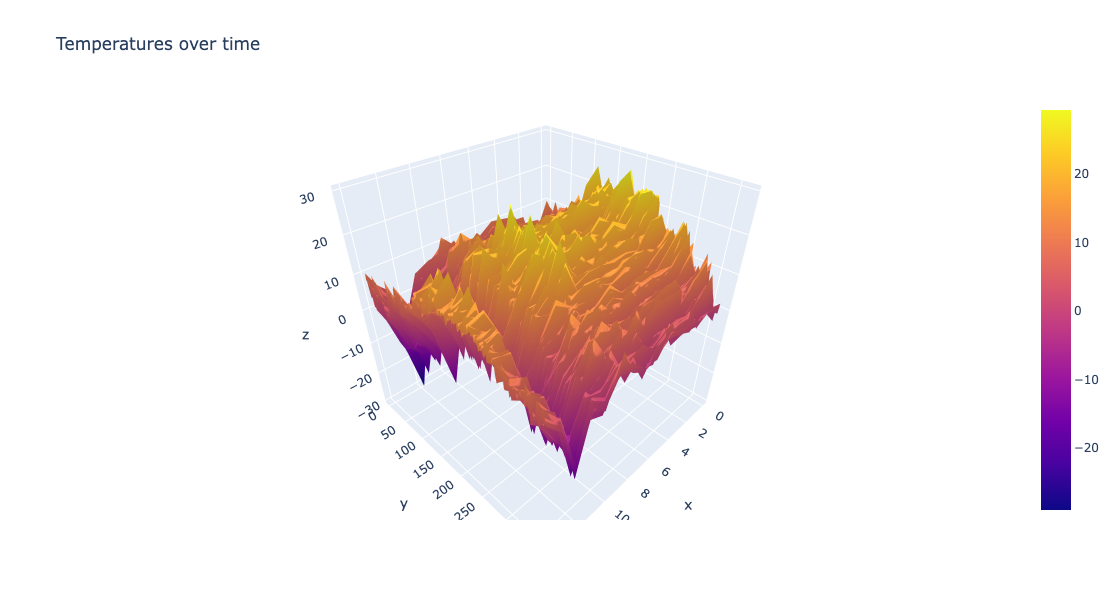

In [53]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notemp_1960.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [61]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [63]:
n_rows = df_1960.shape[0]
n_rows

366

In [65]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_1960['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) #For BASEL

In [67]:
#Check the shape of X and Y
X.shape, y.shape

((366, 2), (366, 1))

In [71]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_1960['BASEL_temp_mean']) #For BASEL
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [73]:
#what is the min temperature? 
df_1960['BASEL_temp_mean'].min()

-13.1

In [75]:
#what is the max temperature?
df_1960['BASEL_temp_mean'].max()

23.8

In [77]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [79]:
compute_cost(X,y)

array([70.13307377])

In [81]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [147]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=7000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 5.28 s, sys: 51.9 ms, total: 5.34 s
Wall time: 5.39 s


In [148]:
theta

array([[3.81166648],
       [2.72576203]])

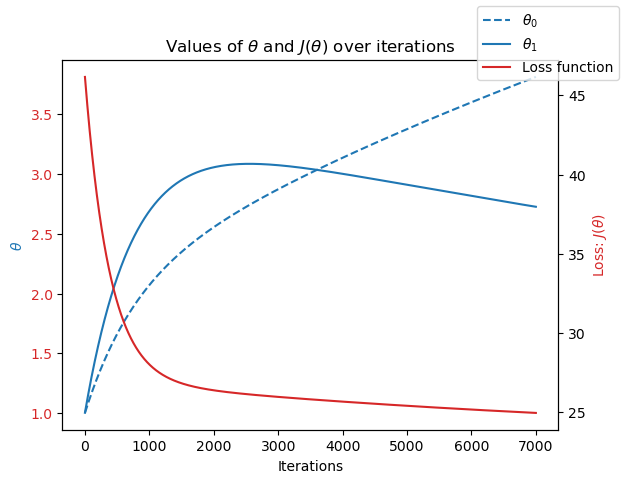

In [149]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [153]:
#Check theta to find the limits
print(theta)

[[3.81166648]
 [2.72576203]]


In [155]:
%%time
# theta range
theta0_vals = np.linspace(0, 8, 100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0, 6, 100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.37 s, sys: 25.6 ms, total: 2.4 s
Wall time: 2.38 s


In [157]:
#Check shape to verify it worked
print(J_vals.shape)  # Should output (100, 100)

(100, 100)


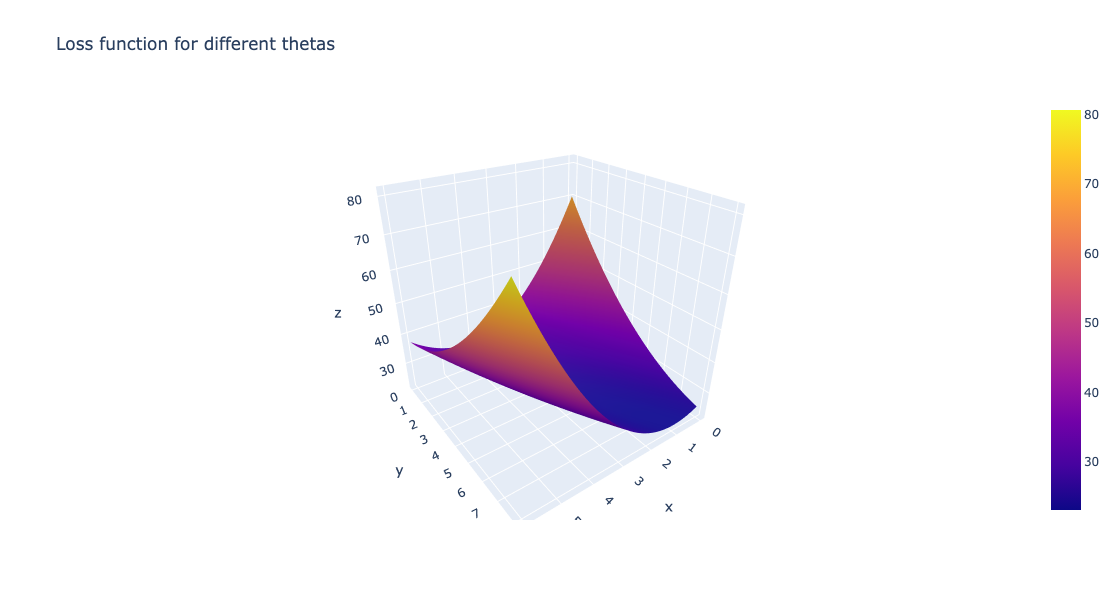

In [159]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

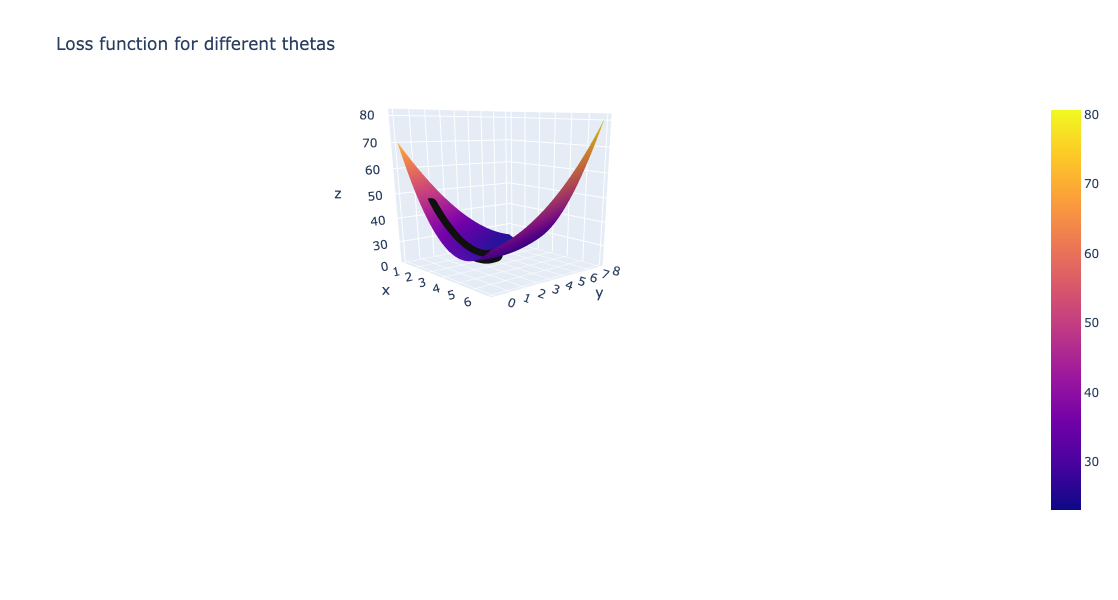

In [161]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Belgrade 1960

In [176]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_1960['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

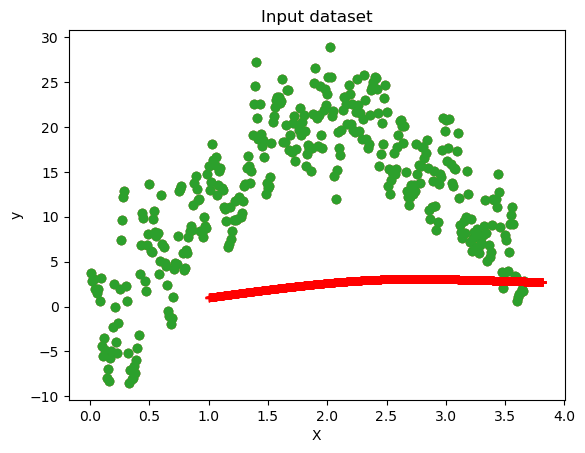

In [180]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_1960['BELGRADE_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [182]:
#what is the min temperature? 
df_1960['BELGRADE_temp_mean'].min()

-8.5

In [188]:
#what is the max temperature? 
df_1960['BELGRADE_temp_mean'].max()

28.9

In [190]:
compute_cost(X,y)

array([109.35110656])

In [192]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=7000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 5.02 s, sys: 37.7 ms, total: 5.05 s
Wall time: 5.28 s


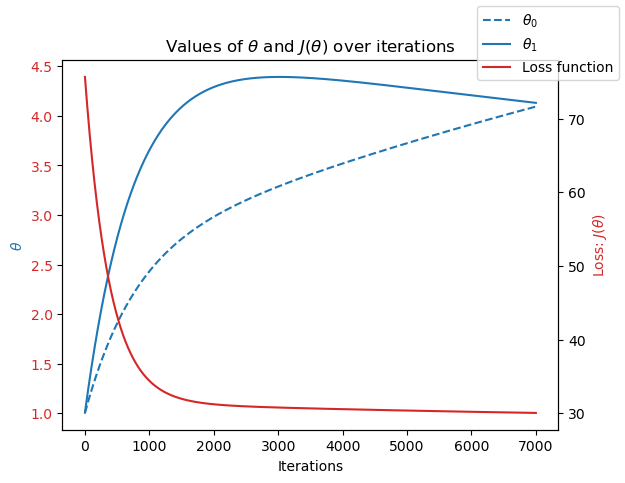

In [194]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [196]:
#Check theta to find the limits
print(theta)

[[4.09447713]
 [4.13200344]]


In [198]:
%%time
# theta range
theta0_vals = np.linspace(0, 8, 100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0, 6, 100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.41 s, sys: 28.8 ms, total: 2.44 s
Wall time: 2.44 s


In [200]:
#Check shape to verify it worked
print(J_vals.shape)  # Should output (100, 100)

(100, 100)


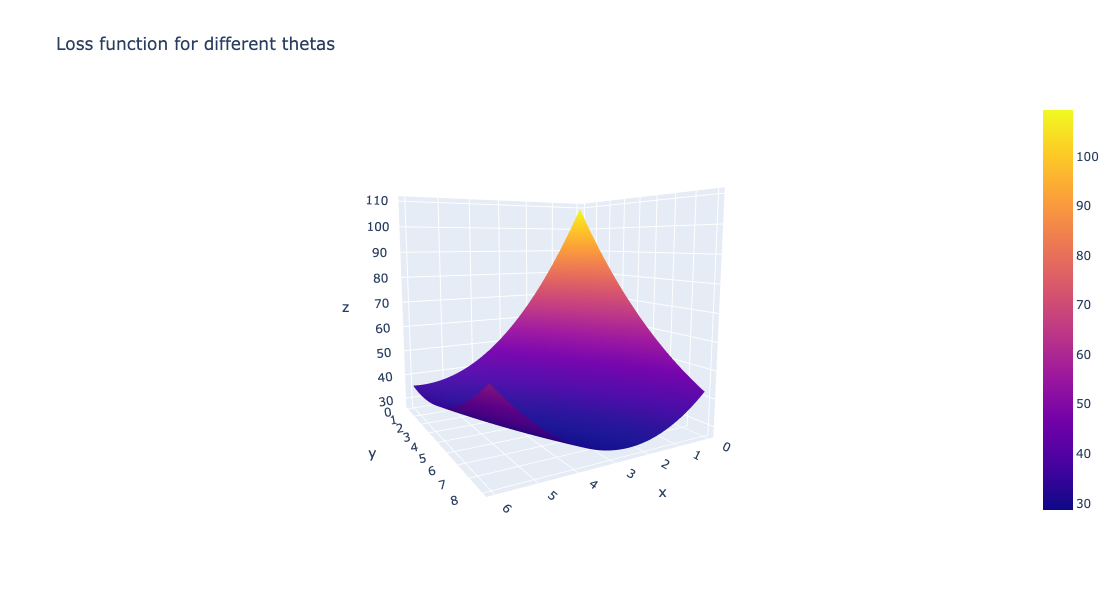

In [202]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Budapest 1960

In [206]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_1960['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

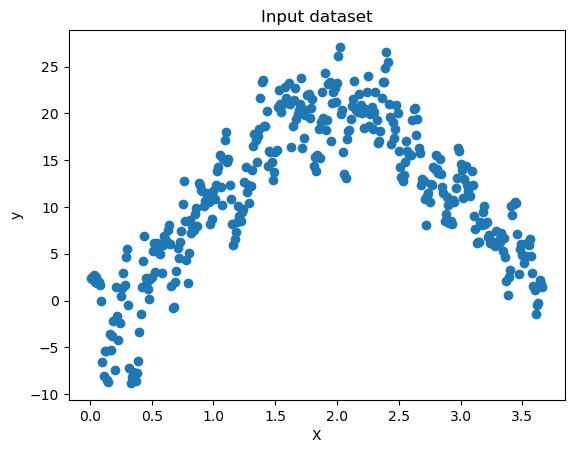

In [208]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_1960['BUDAPEST_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [210]:
#what is the min temperature? 
df_1960['BUDAPEST_temp_mean'].min()

-8.8

In [212]:
#what is the max temperature? 
df_1960['BUDAPEST_temp_mean'].max()

27.1

In [214]:
compute_cost(X,y)

array([95.01724044])

In [216]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=7000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 5.16 s, sys: 34.3 ms, total: 5.19 s
Wall time: 5.25 s


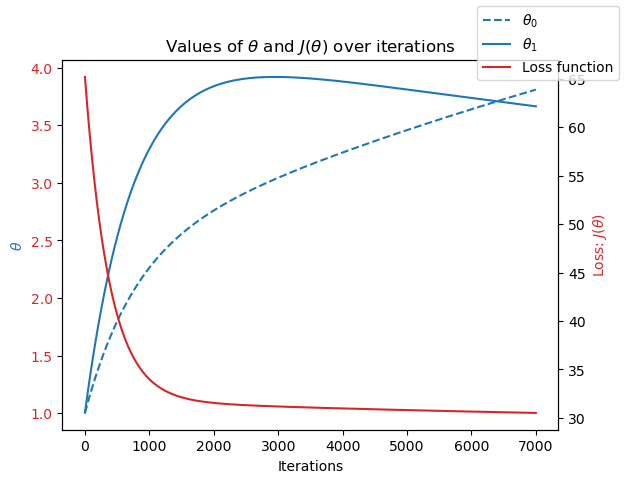

In [218]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [220]:
#Check theta to find the limits
print(theta)

[[3.81060546]
 [3.66504332]]


In [222]:
%%time
# theta range
theta0_vals = np.linspace(0, 8, 100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0, 6, 100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.43 s, sys: 36.8 ms, total: 2.47 s
Wall time: 2.46 s


In [224]:
#Check shape to verify it worked
print(J_vals.shape)  # Should output (100, 100)

(100, 100)


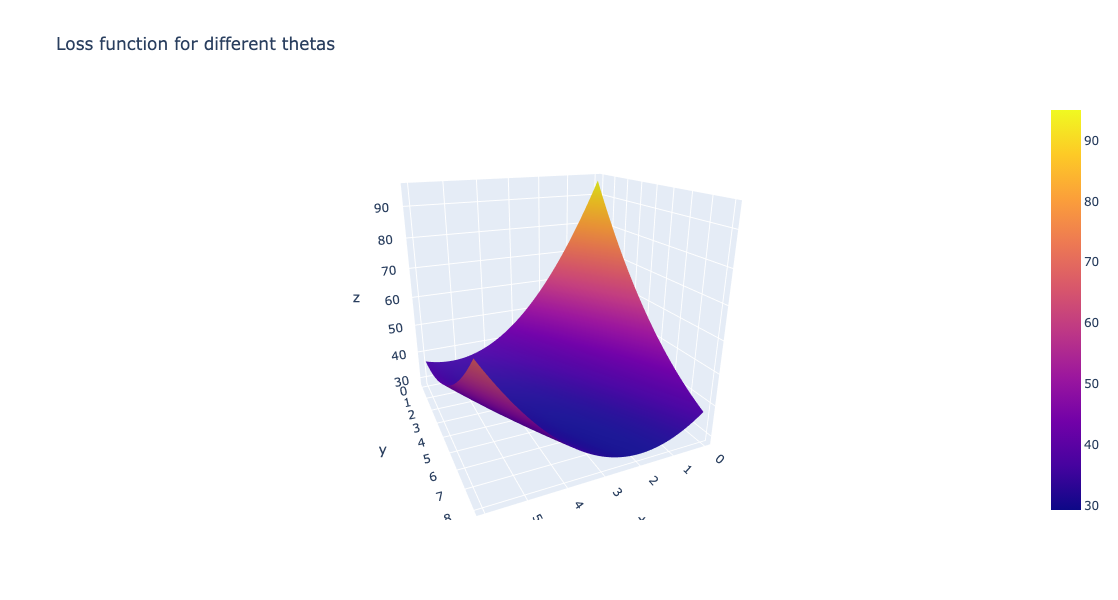

In [226]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()